In [1]:
import scanpy as sc
import numpy as np
import scanpy.external as sce
import pandas as pd
import scvelo as scv
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
import sys
import symphonypy as sp

# Figures aesthetics
sc.set_figure_params(dpi=150)

# Pathes
DATA_PATH = "/home/sergey/data/clonal_project"
HOME_PATH = "/home/sergey/projects/clonal_project"

# Additional functions
exec(open(f"{HOME_PATH}/tools/tools.py").read())
sns.set_style("ticks")

g2m_genes = list(pd.read_csv("/home/sergey/data/additional/cell_cycle_genes/G2M_phase.txt", names=["gene"]).gene)
g2m_genes = [gene[0].upper() + gene[1:].lower() for gene in g2m_genes]

s_genes = list(pd.read_csv("/home/sergey/data/additional/cell_cycle_genes/S_phase.txt", names=["gene"]).gene)
s_genes = [gene[0].upper() + gene[1:].lower() for gene in s_genes]

In [2]:
adata_counts = sc.read_h5ad(f"{DATA_PATH}/anndatas_counts/reference_E13.h5ad")
adata_annotated = sc.read_h5ad(f"{DATA_PATH}/anndatas/reference_integrations_E13.h5ad")
adata = adata_counts[adata_annotated.obs.celltype_l0 == "mesenchyma"]

In [4]:
for location in ["face", "trunk"]:
    adata_tmp = adata[adata.obs.location == location]
    prepare_embedding(adata_tmp, f"mesenchyme_{location}_E13")

Harmony integration with harmonypy is preforming.


2023-02-10 09:11:43,211 - harmonypy - INFO - Iteration 1 of 30
2023-02-10 09:11:54,344 - harmonypy - INFO - Iteration 2 of 30
2023-02-10 09:12:05,067 - harmonypy - INFO - Iteration 3 of 30
2023-02-10 09:12:15,902 - harmonypy - INFO - Iteration 4 of 30
2023-02-10 09:12:26,568 - harmonypy - INFO - Iteration 5 of 30
2023-02-10 09:12:36,688 - harmonypy - INFO - Iteration 6 of 30
2023-02-10 09:12:46,786 - harmonypy - INFO - Iteration 7 of 30
2023-02-10 09:12:57,484 - harmonypy - INFO - Iteration 8 of 30
2023-02-10 09:13:07,813 - harmonypy - INFO - Iteration 9 of 30
2023-02-10 09:13:18,307 - harmonypy - INFO - Iteration 10 of 30
2023-02-10 09:13:28,238 - harmonypy - INFO - Iteration 11 of 30
2023-02-10 09:13:37,828 - harmonypy - INFO - Iteration 12 of 30
2023-02-10 09:13:48,065 - harmonypy - INFO - Iteration 13 of 30
2023-02-10 09:13:57,277 - harmonypy - INFO - Iteration 14 of 30
2023-02-10 09:14:07,500 - harmonypy - INFO - Iteration 15 of 30
2023-02-10 09:14:17,147 - harmonypy - INFO - Iter

Harmony integration with harmonypy is preforming.


2023-02-10 09:18:42,645 - harmonypy - INFO - Iteration 1 of 30
INFO:harmonypy:Iteration 1 of 30
2023-02-10 09:19:04,497 - harmonypy - INFO - Iteration 2 of 30
INFO:harmonypy:Iteration 2 of 30
2023-02-10 09:19:26,066 - harmonypy - INFO - Iteration 3 of 30
INFO:harmonypy:Iteration 3 of 30
2023-02-10 09:19:49,148 - harmonypy - INFO - Iteration 4 of 30
INFO:harmonypy:Iteration 4 of 30
2023-02-10 09:20:09,372 - harmonypy - INFO - Iteration 5 of 30
INFO:harmonypy:Iteration 5 of 30
2023-02-10 09:20:29,666 - harmonypy - INFO - Iteration 6 of 30
INFO:harmonypy:Iteration 6 of 30
2023-02-10 09:20:50,336 - harmonypy - INFO - Iteration 7 of 30
INFO:harmonypy:Iteration 7 of 30
2023-02-10 09:21:10,483 - harmonypy - INFO - Iteration 8 of 30
INFO:harmonypy:Iteration 8 of 30
2023-02-10 09:21:32,115 - harmonypy - INFO - Iteration 9 of 30
INFO:harmonypy:Iteration 9 of 30
2023-02-10 09:21:51,966 - harmonypy - INFO - Converged after 9 iterations
INFO:harmonypy:Converged after 9 iterations


## Trunk

In [2]:
adata = sc.read_h5ad(f"{DATA_PATH}/anndatas/mesenchyme_trunk_E13_reference.h5ad")

In [38]:
ct = pd.read_csv("Cell_type_tables/trunk_mes.tsv", sep="\t", names=["leiden", "ct3", "ct2"])
ct.leiden = ct.leiden.astype(str)
ct2_dict = dict(zip(ct.leiden, ct.ct2))
ct3_dict = dict(zip(ct.leiden, ct.ct3))

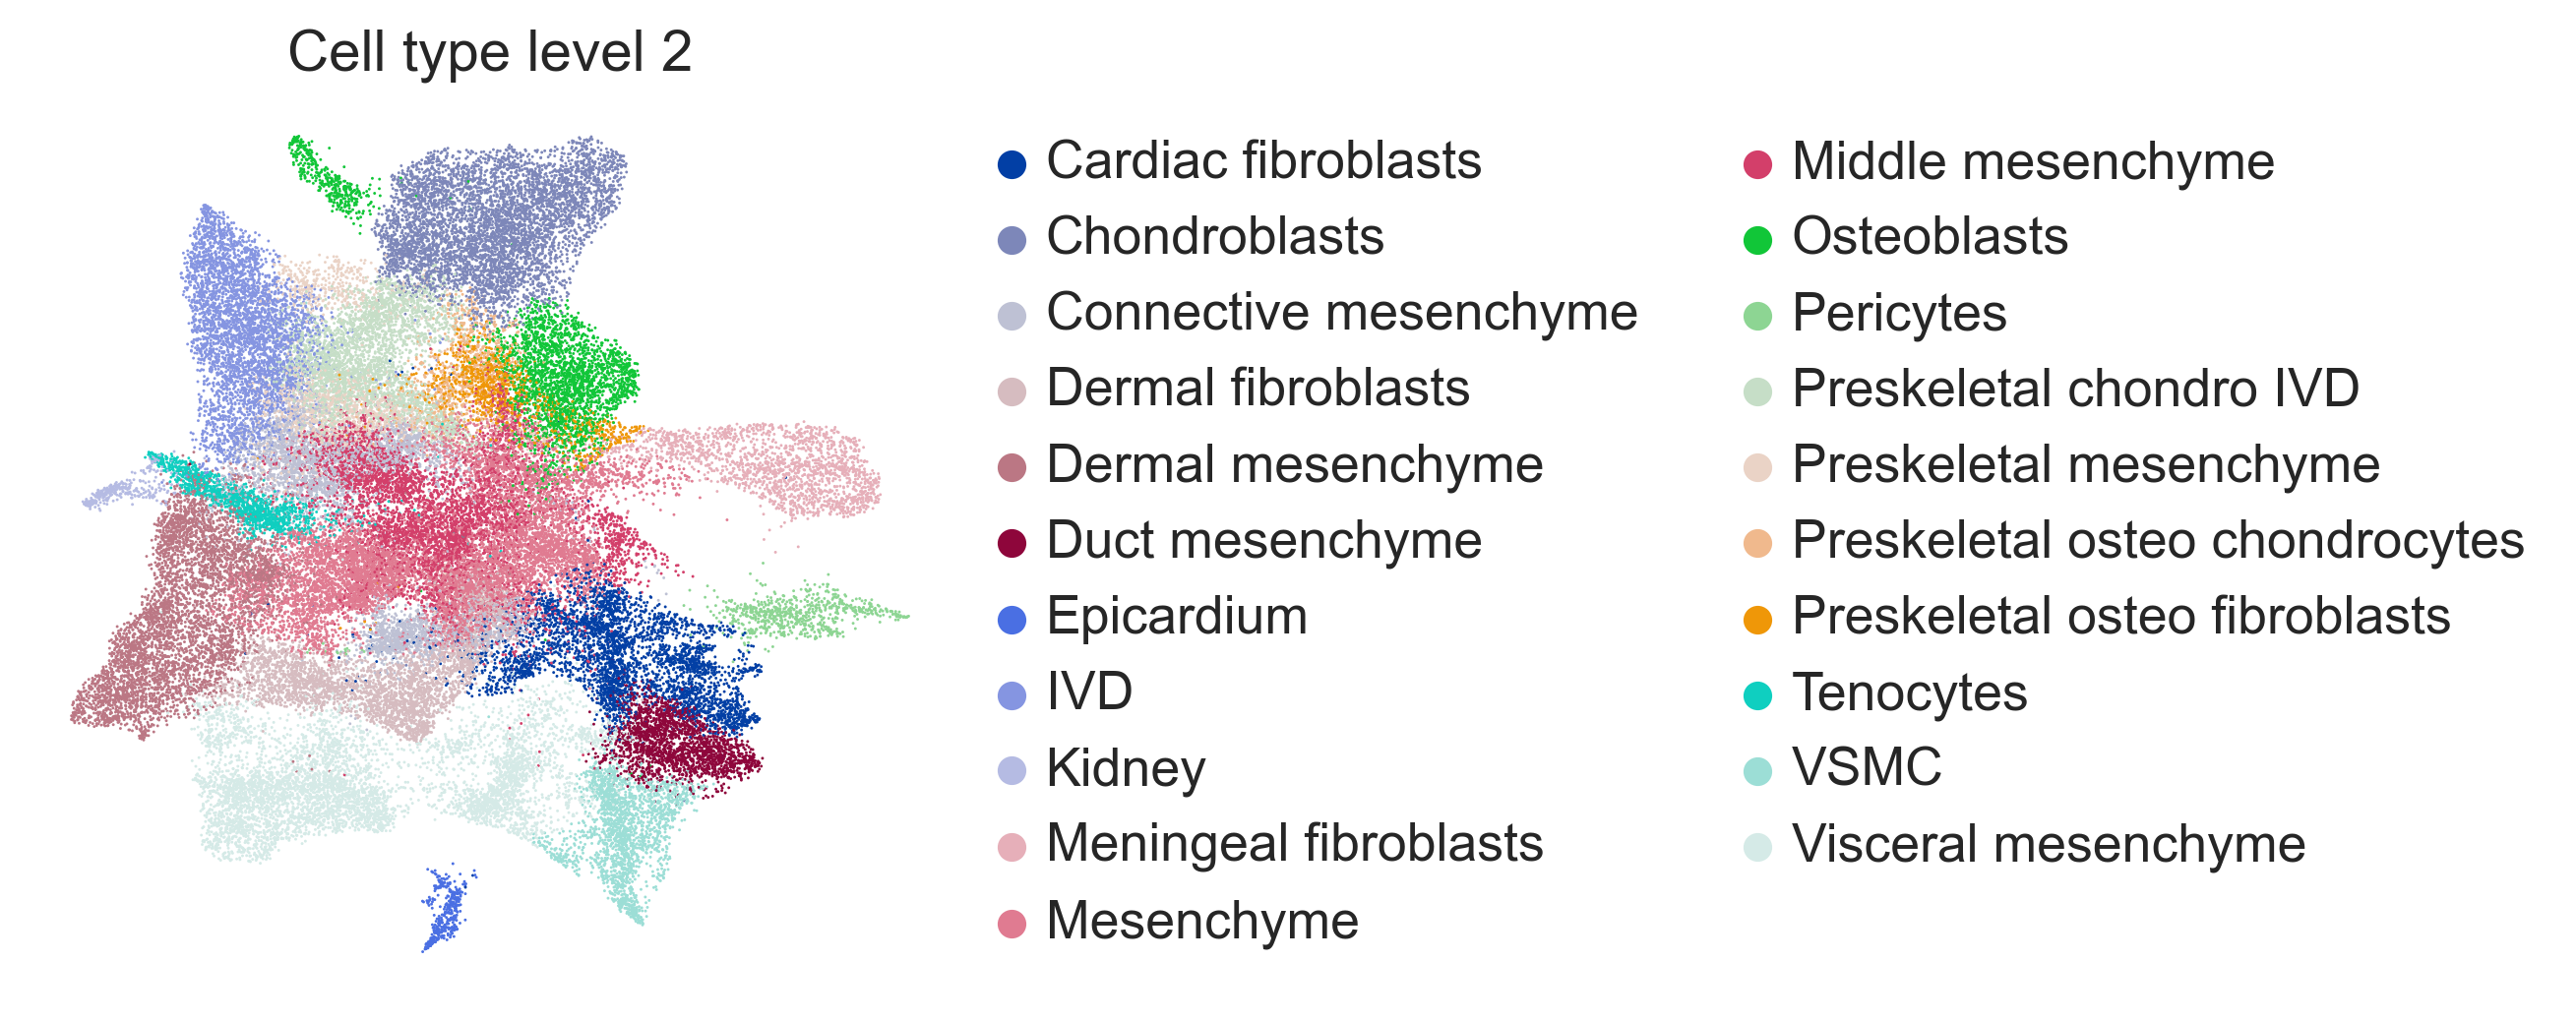

In [39]:
adata.obs["celltype_l2"] = [ct2_dict[leiden] for leiden in adata.obs.leiden_3]
sc.pl.umap(adata, color="celltype_l2", title="Cell type level 2", frameon=False)

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

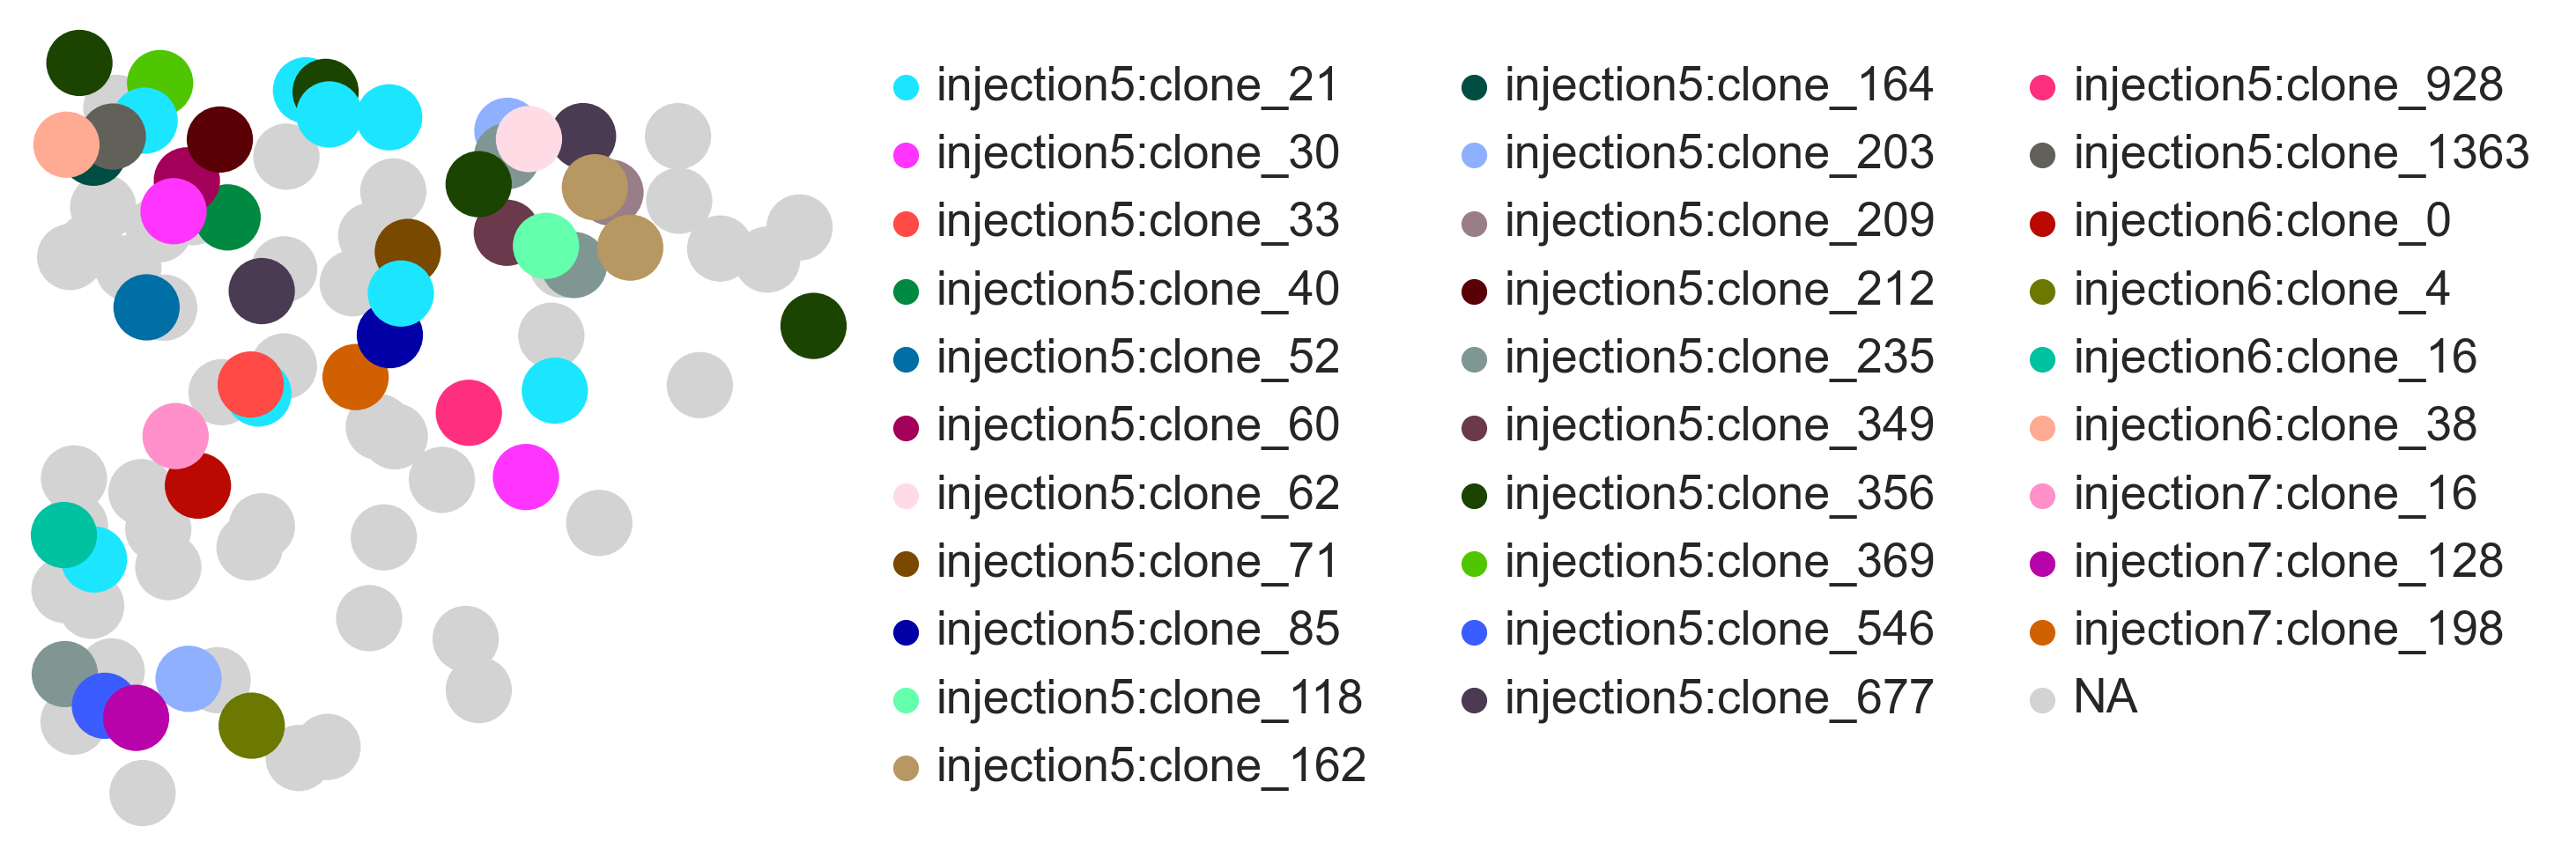

In [50]:
fig, ax = plt.subplots(figsize=(4, 4))

umap_xlim = (4.5, 5)
umap_ylim = (11, 20)

adata_to_draw = adata[
    (adata.obsm["X_umap"][:, 0] < umap_xlim[1]) & 
    (adata.obsm["X_umap"][:, 0] > umap_xlim[0]) & 
    (adata.obsm["X_umap"][:, 1] < umap_ylim[1]) & 
    (adata.obsm["X_umap"][:, 1] > umap_ylim[0])
]
clones = [i for i in adata_to_draw.obs["E7.5:clones"] if i != "NA"]
clones = list(set(clones))
sc.pl.umap(adata_to_draw, frameon=False, ax=ax, show=False, color="E7.5:clones", title="", groups=clones)

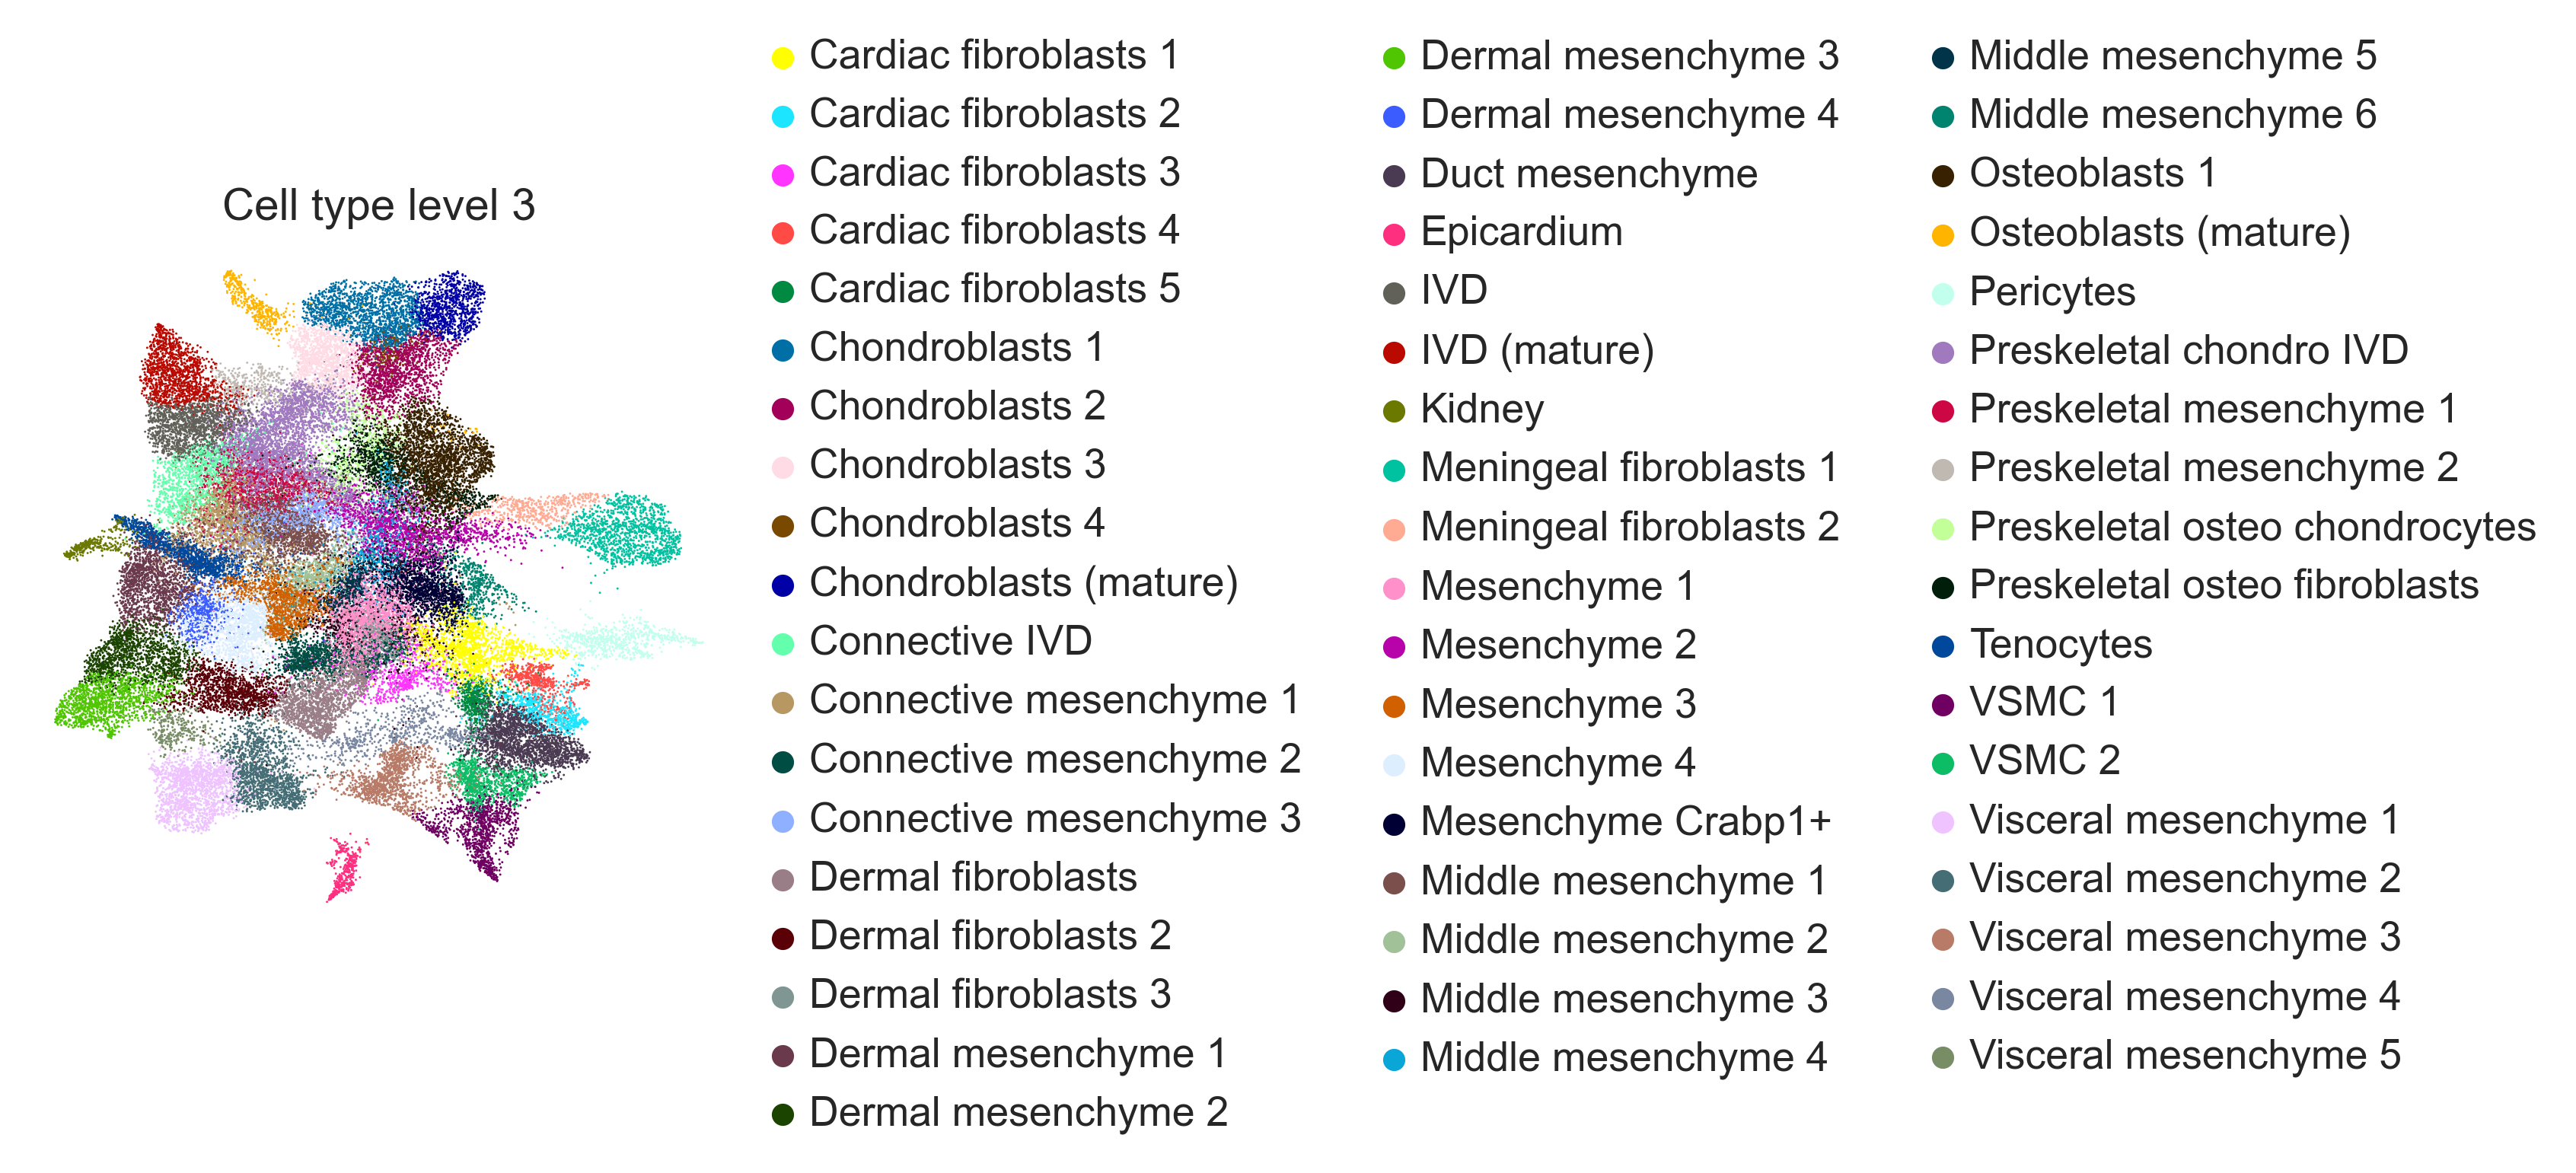

In [40]:
adata.obs["celltype_l3"] = [ct3_dict[leiden] for leiden in adata.obs.leiden_3]
sc.pl.umap(adata, color="celltype_l3", title="Cell type level 3", frameon=False)

In [41]:
adata.raw.to_adata().write_h5ad(f"{DATA_PATH}/cellxgene/mesenchyme_trunk_E13.h5ad")
adata.write_h5ad(f"{DATA_PATH}/anndatas/mesenchyme_trunk_E13_reference.h5ad")

## Cranial

In [42]:
adata = sc.read_h5ad(f"{DATA_PATH}/anndatas/mesenchyme_face_E13_reference.h5ad")

In [43]:
ct = pd.read_csv("Cell_type_tables/cranial_mes.tsv", sep="\t", names=["leiden", "ct3", "ct2"])
ct.leiden = ct.leiden.astype(str)
ct2_dict = dict(zip(ct.leiden, ct.ct2))
ct3_dict = dict(zip(ct.leiden, ct.ct3))

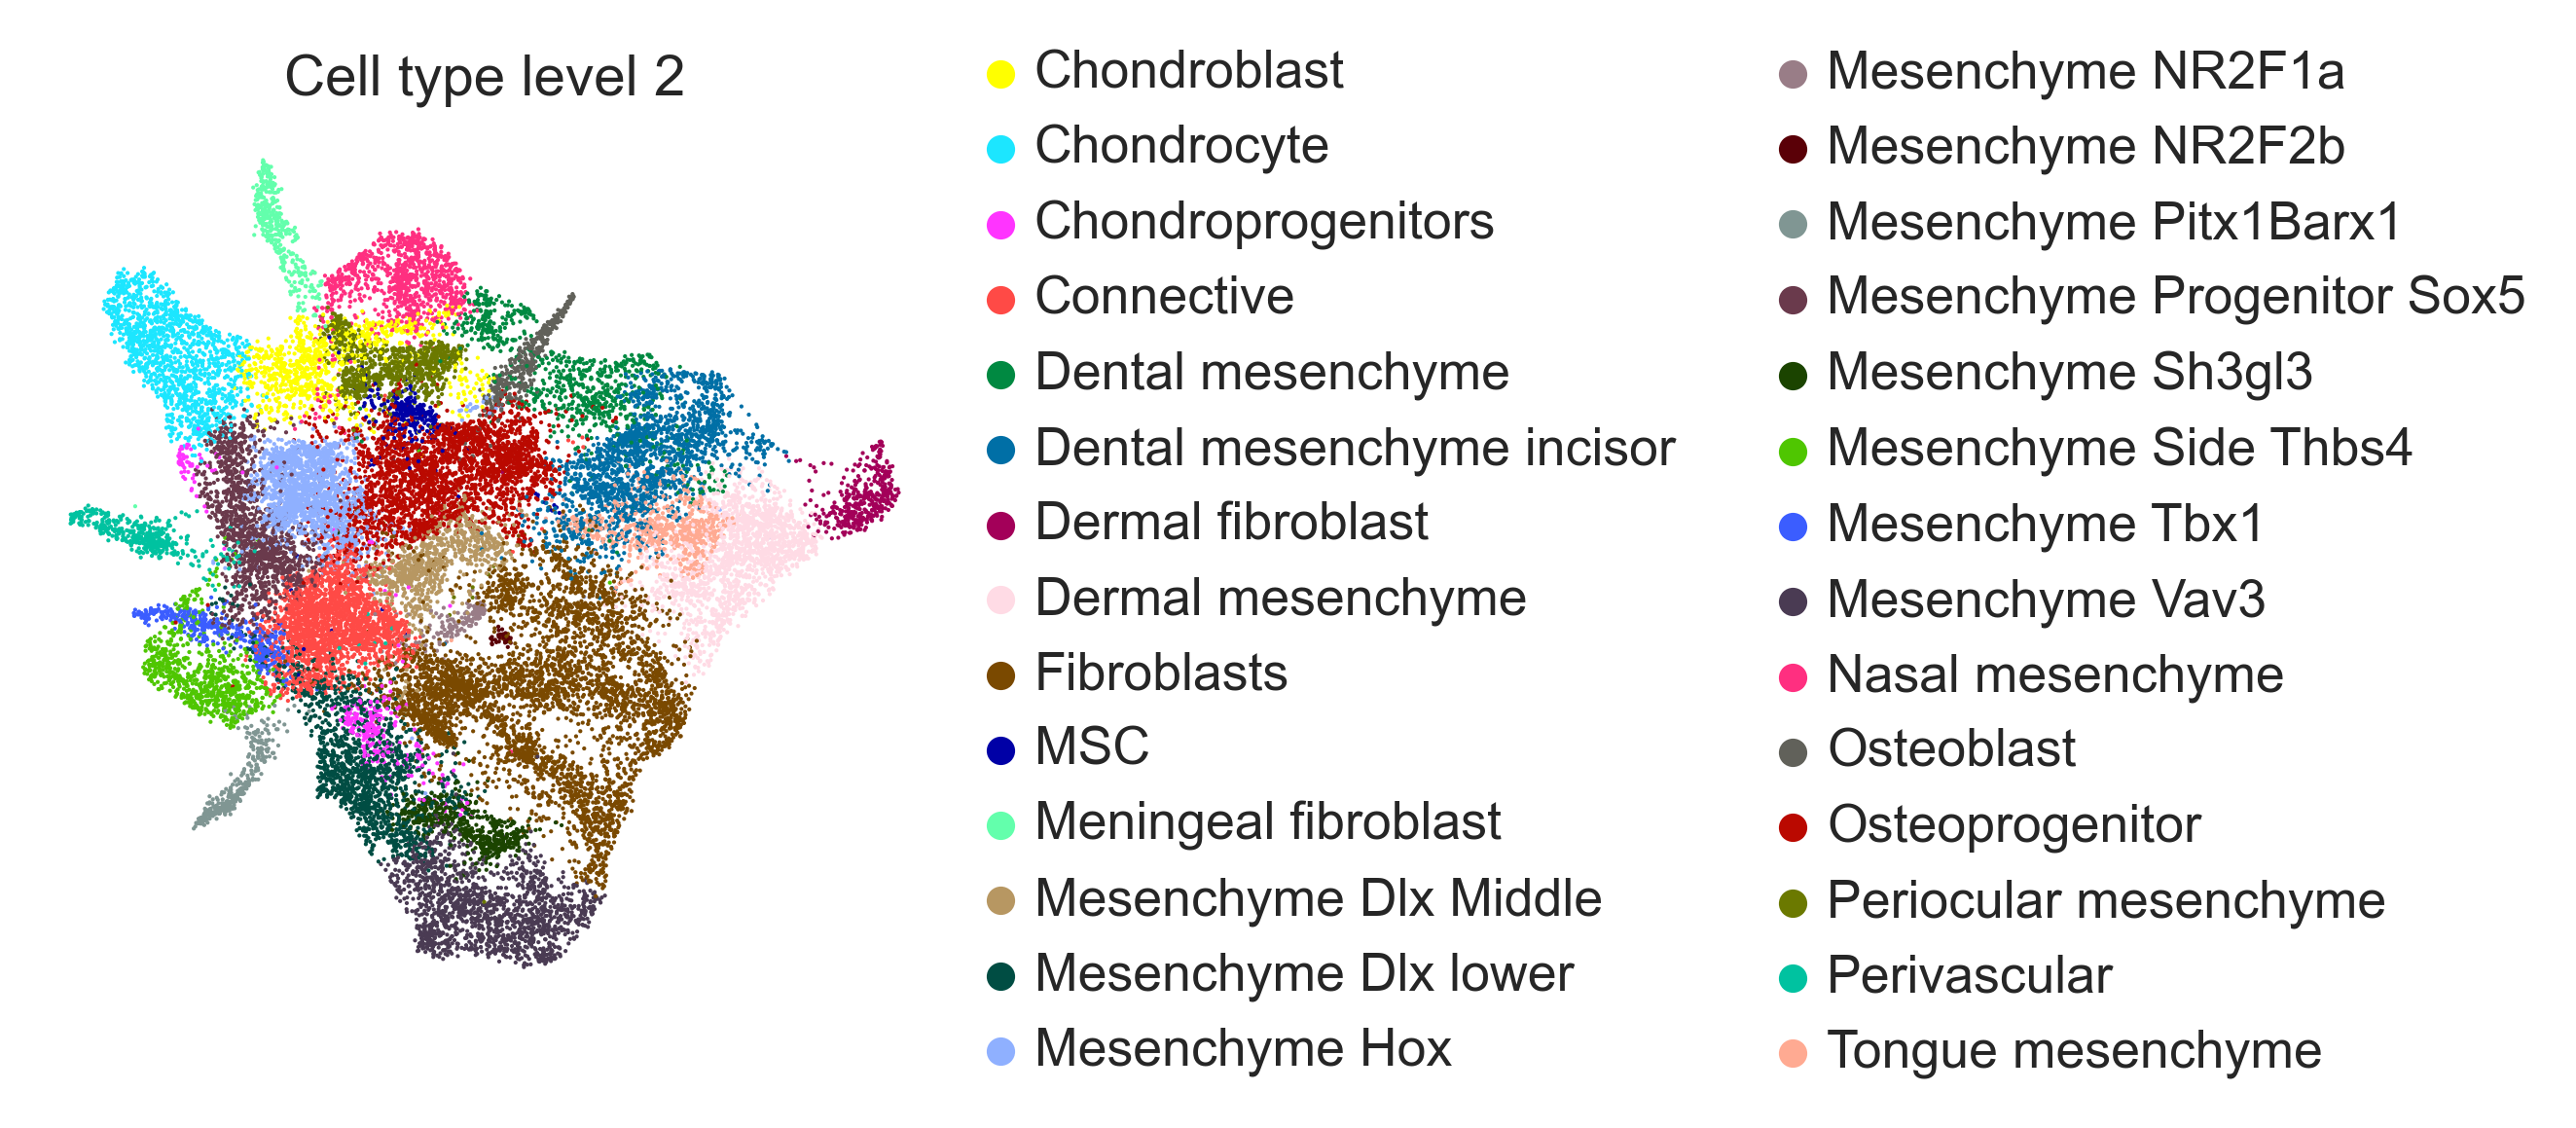

In [44]:
adata.obs["celltype_l2"] = [ct2_dict[leiden] for leiden in adata.obs["leiden_1.5"]]
sc.pl.umap(adata, color="celltype_l2", title="Cell type level 2", frameon=False)

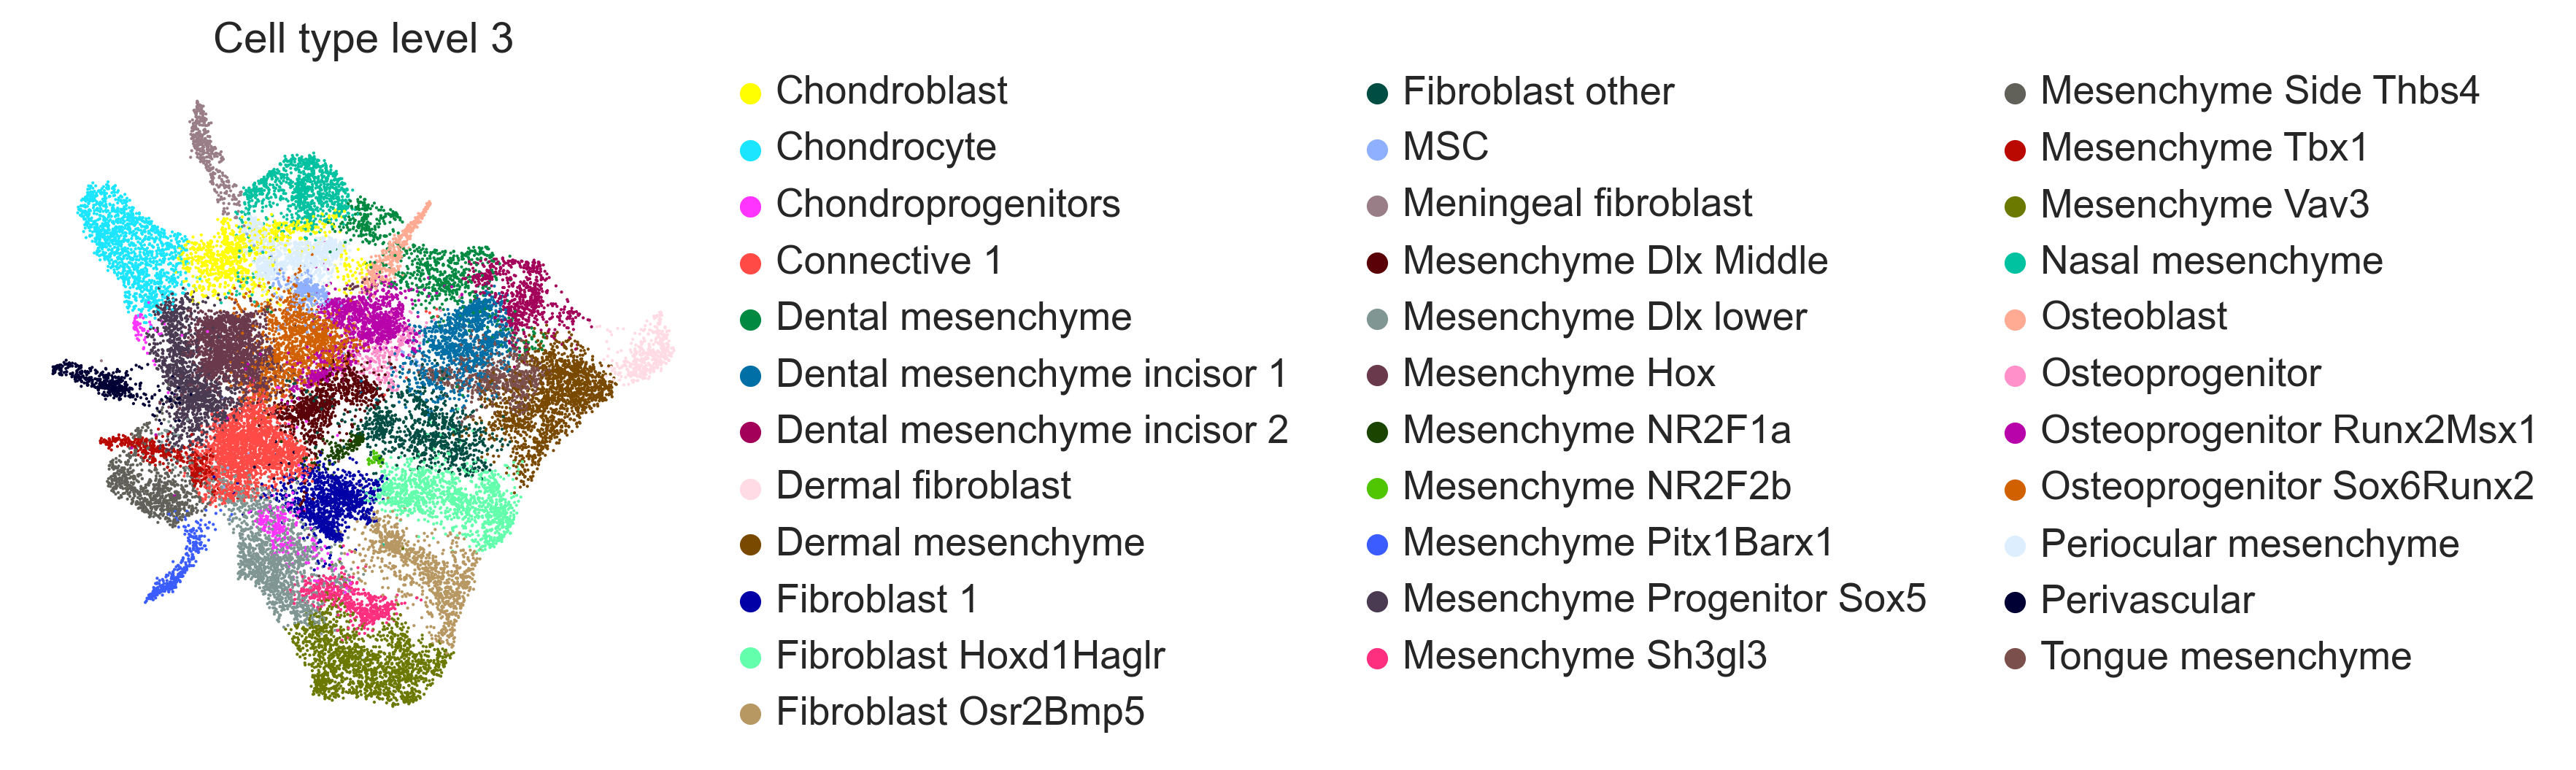

In [45]:
adata.obs["celltype_l3"] = [ct3_dict[leiden] for leiden in adata.obs["leiden_1.5"]]
sc.pl.umap(adata, color="celltype_l3", title="Cell type level 3", frameon=False)

In [46]:
adata.raw.to_adata().write_h5ad(f"{DATA_PATH}/cellxgene/mesenchyme_face_E13.h5ad")
adata.write_h5ad(f"{DATA_PATH}/anndatas/mesenchyme_face_E13_reference.h5ad")